In [1]:
from __future__ import print_function, division
from builtins import range
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_action(s, w):
    return 1 if s.dot(w) > 0 else 0

In [3]:
def play_one_episode(env, params):
    observation = env.reset()
    done = False
    t = 0
    
    while not done and t < 10000:  #< 200 #<10000
        #env.render()
        t += 1
        action = get_action(observation, params)
        observation, reward, done, info = env.step(action)
        if done:
            break
            
    return t

In [4]:
def play_multiple_episodes(env, T, params):
    episode_lengths = np.empty(T)
    
    for i in range(T):
        episode_lengths[i] = play_one_episode(env, params)
        
    avg_length = episode_lengths.mean()
    print("Avg lenght:", avg_length)
    return avg_length

In [5]:
def random_search(env):
    episode_lenghts = []
    best = 0
    params = None
    for t in xrange(100):
        new_params = np.random.random(4)*2 - 1
        avg_lenght = play_multiple_episodes(env, 100, new_params)
        episode_lenghts.append(avg_lenght)
        
        if avg_lenght > best:
            params = new_params
            best = avg_lenght
    return episode_lenghts, params

[2017-10-14 05:53:38,382] Making new env: CartPole-v0


Avg lenght: 62.12
Avg lenght: 44.83
Avg lenght: 10.03
Avg lenght: 46.3
Avg lenght: 9.24
Avg lenght: 44.52
Avg lenght: 9.01
Avg lenght: 9.31
Avg lenght: 100.91
Avg lenght: 110.84
Avg lenght: 9.34
Avg lenght: 9.14
Avg lenght: 9.16
Avg lenght: 9.16
Avg lenght: 48.71
Avg lenght: 49.93
Avg lenght: 53.28
Avg lenght: 142.23
Avg lenght: 9.22
Avg lenght: 11.71
Avg lenght: 24.62
Avg lenght: 37.7
Avg lenght: 9.06
Avg lenght: 9.25
Avg lenght: 9.7
Avg lenght: 96.72
Avg lenght: 9.11
Avg lenght: 146.91
Avg lenght: 9.03
Avg lenght: 9.07
Avg lenght: 9.65
Avg lenght: 15.41
Avg lenght: 9.24
Avg lenght: 170.84
Avg lenght: 9.86
Avg lenght: 9.18
Avg lenght: 9.62
Avg lenght: 9.53
Avg lenght: 8.81
Avg lenght: 196.57
Avg lenght: 127.07
Avg lenght: 88.07
Avg lenght: 48.54
Avg lenght: 9.33
Avg lenght: 147.41
Avg lenght: 9.16
Avg lenght: 8.9
Avg lenght: 9.59
Avg lenght: 70.72
Avg lenght: 9.63
Avg lenght: 52.14
Avg lenght: 9.02
Avg lenght: 9.33
Avg lenght: 9.42
Avg lenght: 55.83
Avg lenght: 9.59
Avg lenght: 9.86
A

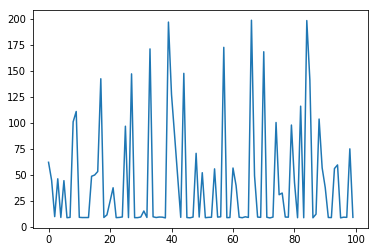

***Final run with final weights***
Avg lenght: 197.99


In [6]:
if __name__ == '__main__':
    env = gym.make('CartPole-v0')
    episode_lenghts, params = random_search(env)
    plt.plot(episode_lenghts)
    plt.show()
    
    # play a final set of episodes
    print("***Final run with final weights***")
    play_multiple_episodes(env, 100, params)